In [1]:
# Load book & podcast data
import pandas as pd
import numpy as np
import ast

book_url='https://drive.google.com/file/d/1zDpeQRq4UMKoM83f958mxIK4hxdYodgH/view?usp=sharing'
book_url='https://drive.google.com/uc?id=' + book_url.split('/')[-2]
book_df = pd.read_csv(book_url)
book_df.drop(columns=['title'], inplace=True)
book_df.rename(columns={"clean_title": "title"}, inplace=True)
book_df['embeddings'] = book_df['embeddings'].apply(lambda x: np.array(ast.literal_eval(x)))

podcast_url = 'https://drive.google.com/file/d/10T5dTDKJfcMiIdPsgT4ySr73LKRn0RLj/view?usp=sharing'
podcast_url='https://drive.google.com/uc?id=' + podcast_url.split('/')[-2]
podcast_df = pd.read_csv(podcast_url)
podcast_df.rename(columns={"embedding": "embeddings"}, inplace=True)
podcast_df['embeddings'] = podcast_df['embeddings'].apply(lambda x: np.array(ast.literal_eval(x)))

In [8]:
book_embeddings = book_df['embeddings'].tolist()

In [27]:
from sklearn.manifold import TSNE

book_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(np.array(book_embeddings))

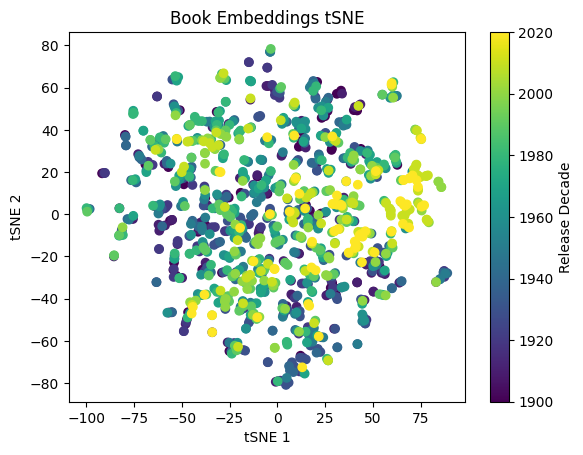

In [33]:
import matplotlib.pyplot as plt

plt.scatter(book_tsne[:, 0], book_tsne[:, 1], c=book_df['decade'].tolist())
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('Book Embeddings tSNE')
plt.colorbar(label='Release Decade')
plt.show()

In [21]:
podcast_embeddings = podcast_df['embeddings'].tolist()

In [31]:
podcast_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(np.array(podcast_embeddings))

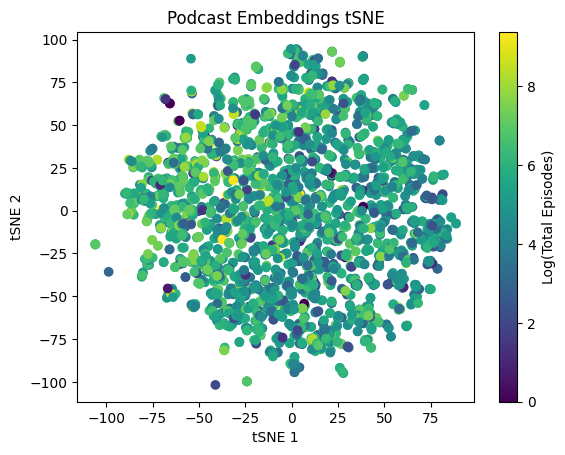

In [39]:
import math

plt.scatter(podcast_tsne[:, 0], podcast_tsne[:, 1], c=podcast_df['total_episodes'].map(lambda x:math.log(x)).tolist())
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('Podcast Embeddings tSNE')
plt.colorbar(label='Log(Total Episodes)')
plt.show()

In [43]:
book_and_podcast_embeddings = np.concat((np.array(book_embeddings), np.array(podcast_embeddings)))

In [44]:
book_and_pod_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(book_and_podcast_embeddings)

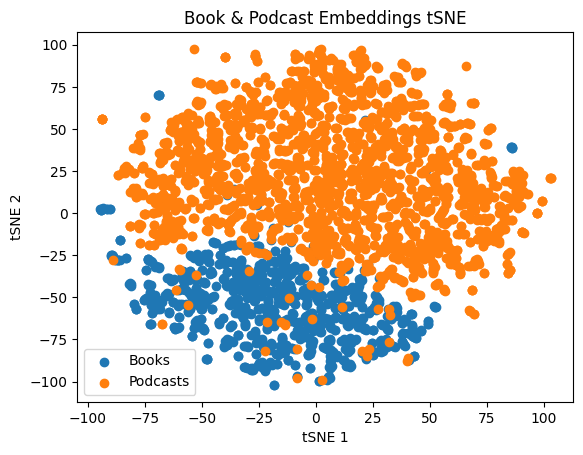

In [45]:
plt.scatter(book_and_pod_tsne[:len(book_embeddings), 0], book_and_pod_tsne[:len(book_embeddings), 1], label='Books')
plt.scatter(book_and_pod_tsne[len(book_embeddings):, 0], book_and_pod_tsne[len(book_embeddings):, 1], label='Podcasts')
plt.legend()
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('Book & Podcast Embeddings tSNE')
plt.show()